1) Faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [54]:
df_agru = df.drop(['Unnamed: 0', 'index'], axis = 1)
df_agru.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [55]:
df_agru.groupby(['posse_de_veiculo', 'posse_de_imovel', 'mau']).mean().sort_values('renda', ascending =False)

qtd_filhos      idade  tempo_emprego  \
posse_de_veiculo posse_de_imovel mau                                           
True             True            False    0.553449  42.260400       6.982100   
                 False           False    0.504702  40.496865       7.305508   
                 True            True     0.541667  41.486111       5.801472   
False            True            False    0.363561  46.432317       8.400049   
                                 True     0.333333  44.925170       5.524898   
                 False           False    0.388326  42.785390       8.166451   
                                 True     0.457447  44.989362       6.550160   
True             False           True     0.897959  36.000000       4.618245   

                                        qt_pessoas_residencia        renda  
posse_de_veiculo posse_de_imovel mau                                        
True             True            False               2.415745  5067.062638  
                 False           False               2.357367  4889.337038  
                 True            True                2.402778  4536.978889  
False            True            False               2.091838  4511.921713  
                                 True                1.979592  4499.876122  
                 False           False               2.136316  4142.264103  
                                 True                2.127660  3941.199468  
True             False           True                2.775510  3921.620204

In [56]:
df_agru.groupby(['tipo_renda'])['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda'].mean()

C:\Users\Artur\AppData\Local\Temp/ipykernel_23020/635450727.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_agru.groupby(['tipo_renda'])['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',


,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
tipo_renda,,,,,,,,
Assalariado,0.419755,0.650652,0.521850,40.823792,7.746352,2.319448,0.022617,4555.150763
Bolsista,0.000000,1.000000,0.000000,51.000000,10.695890,2.000000,0.000000,4580.062500
Empresário,0.440048,0.660526,0.485654,40.106312,6.639774,2.267291,0.027484,5219.621323
Pensionista,0.230830,0.770350,0.043256,59.229257,7.010046,1.753441,0.027527,3525.346445
Servidor público,0.382979,0.638298,0.575228,41.427052,10.565456,2.401216,0.018237,5665.229377


In [60]:
df_trenda = df_agru.groupby(['tipo_renda'])["posse_de_veiculo", "posse_de_imovel", 'renda'].mean()
df_trenda

C:\Users\Artur\AppData\Local\Temp/ipykernel_23020/3090243191.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_trenda = df_agru.groupby(['tipo_renda'])["posse_de_veiculo", "posse_de_imovel", 'renda'].mean()


,posse_de_veiculo,posse_de_imovel,renda
tipo_renda,,,
Assalariado,0.419755,0.650652,4555.150763
Bolsista,0.000000,1.000000,4580.062500
Empresário,0.440048,0.660526,5219.621323
Pensionista,0.230830,0.770350,3525.346445
Servidor público,0.382979,0.638298,5665.229377


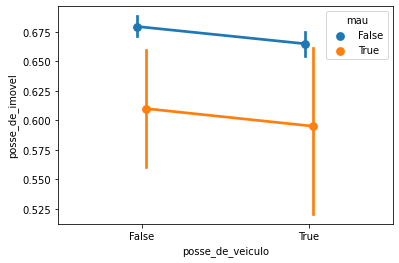

In [57]:
ax = sns.pointplot(x="posse_de_veiculo", y="posse_de_imovel", hue = 'mau',
                   data=df_agru, dodge=True, ci = 90)

Não, essas variáveis não têm evidência suficiente para discriminar a renda de forma significante